In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
import os

In [2]:
path = 'D:/Image Classification Self/Data/Myntra Dataset/myntradataset/'

In [3]:
data = pd.read_csv(path + 'styles.csv')
print(data.shape)
data.head()

(44446, 12)


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,Unnamed: 10,Unnamed: 11
0,15970.0,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt,NaN,NaN
1,39386.0,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans,NaN,NaN
2,59263.0,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch,NaN,NaN
3,21379.0,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants,NaN,NaN
4,53759.0,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt,NaN,NaN


In [4]:
data_req = data.loc[:, ('id', 'articleType')]
data_req = data_req.dropna(axis=0).reset_index(drop=True)
data_req = data_req.sample(frac=1).reset_index(drop=True)
print(data_req.shape)
data_req

(44445, 2)


,id,articleType
0,34244.0,Tshirts
1,36320.0,Tshirts
2,43085.0,Tshirts
3,31211.0,Sports Shoes
4,26352.0,Watches
...,...,...
44440,45360.0,Heels
44441,20783.0,Flats
44442,43878.0,Casual Shoes
44443,28863.0,Tshirts


Tshirts


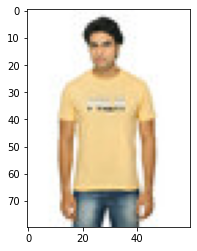

In [5]:
import matplotlib.pyplot as plt

print(data_req['articleType'][0])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][0])) + '.jpg'), cv.COLOR_BGR2RGB))

Tshirts


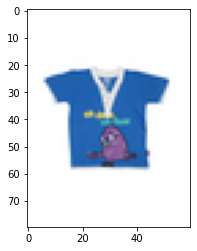

In [6]:
print(data_req['articleType'][1])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][1])) + '.jpg'), cv.COLOR_BGR2RGB))

Sports Shoes


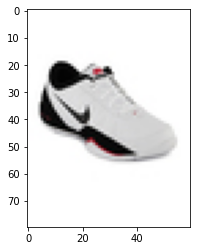

In [7]:
print(data_req['articleType'][3])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][3])) + '.jpg'), cv.COLOR_BGR2RGB))

Mascara


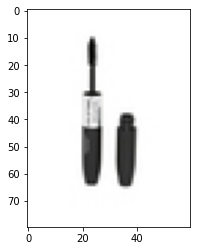

In [8]:
print(data_req['articleType'][1001])
plt.imshow(cv.cvtColor(cv.imread(path + 'images/' + str(int(data_req['id'][1001])) + '.jpg'), cv.COLOR_BGR2RGB))

In [9]:
classes = {'Accessory Gift Set':0, 'Baby Dolls':1, 'Backpacks':2, 'Bangle':3,
       'Basketballs':4, 'Bath Robe':5, 'Beauty Accessory':6, 'Belts':7, 'Blazers':8,
       'Body Lotion':9, 'Body Wash and Scrub':10, 'Booties':11, 'Boxers':12, 'Bra':13,
       'Bracelet':14, 'Briefs':15, 'Camisoles':16, 'Capris':17, 'Caps':18,
       'Casual Shoes':19, 'Churidar':20, 'Clothing Set':21, 'Clutches':22, 'Compact':23,
       'Concealer':24, 'Cufflinks':25, 'Cushion Covers':26, 'Deodorant':27, 'Dresses':28,
       'Duffel Bag':29, 'Dupatta':30, 'Earrings':31, 'Eye Cream':32, 'Eyeshadow':33,
       'Face Moisturisers':34, 'Face Scrub and Exfoliator':35,
       'Face Serum and Gel':36, 'Face Wash and Cleanser':37, 'Flats':38,
       'Flip Flops':39, 'Footballs':40, 'Formal Shoes':41, 'Foundation and Primer':42,
       'Fragrance Gift Set':43, 'Free Gifts':44, 'Gloves':45, 'Hair Accessory':46,
       'Hair Colour':47, 'Handbags':48, 'Hat':49, 'Headband':50, 'Heels':51,
       'Highlighter and Blush':52, 'Innerwear Vests':53, 'Ipad':54, 'Jackets':55,
       'Jeans':56, 'Jeggings':57, 'Jewellery Set':58, 'Jumpsuit':59,
       'Kajal and Eyeliner':60, 'Key chain':61, 'Kurta Sets':62, 'Kurtas':63,
       'Kurtis':64, 'Laptop Bag':65, 'Leggings':66, 'Lehenga Choli':67, 'Lip Care':68,
       'Lip Gloss':69, 'Lip Liner':70, 'Lip Plumper':71, 'Lipstick':72,
       'Lounge Pants':73, 'Lounge Shorts':74, 'Lounge Tshirts':75,
       'Makeup Remover':76, 'Mascara':77, 'Mask and Peel':78, 'Mens Grooming Kit':79,
       'Messenger Bag':80, 'Mobile Pouch':81, 'Mufflers':82, 'Nail Essentials':83,
       'Nail Polish':84, 'Necklace and Chains':85, 'Nehru Jackets':86,
       'Night suits':87, 'Nightdress':88, 'Patiala':89, 'Pendant':90,
       'Perfume and Body Mist':91, 'Rain Jacket':92, 'Rain Trousers':93, 'Ring':94,
       'Robe':95, 'Rompers':96, 'Rucksacks':97, 'Salwar':98, 'Salwar and Dupatta':99,
       'Sandals':100, 'Sarees':101, 'Scarves':102, 'Shapewear':103, 'Shirts':104,
       'Shoe Accessories':105, 'Shoe Laces':106, 'Shorts':107, 'Shrug':108, 'Skirts':109,
       'Socks':110, 'Sports Sandals':111, 'Sports Shoes':112, 'Stockings':113, 'Stoles':114,
       'Suits':115, 'Sunglasses':116, 'Sunscreen':117, 'Suspenders':118, 'Sweaters':119,
       'Sweatshirts':120, 'Swimwear':121, 'Tablet Sleeve':122, 'Ties':123,
       'Ties and Cufflinks':124, 'Tights':125, 'Toner':126, 'Tops':127, 'Track Pants':128,
       'Tracksuits':129, 'Travel Accessory':130, 'Trolley Bag':131, 'Trousers':132,
       'Trunk':133, 'Tshirts':134, 'Tunics':135, 'Umbrellas':136, 'Waist Pouch':137,
       'Waistcoat':138, 'Wallets':139, 'Watches':140, 'Water Bottle':141, 'Wristbands':142}

In [10]:
images = []
labels = []

def load_data(dataset):
    for i in range(len(dataset)):
        image = cv.imread(path + 'images/' + str(int(dataset['id'][i])) + '.jpg')
        if image is None:
            continue
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        image = cv.resize(image, (60, 80))
        image = image.astype('float32')/255.0
        label = classes[dataset['articleType'][i]]
        images.append(image)
        labels.append(label)
    images_r = np.array(images)
    labels_r = np.array(labels)
    return images_r, labels_r

In [11]:
images, labels = load_data(data_req)

In [12]:
images.shape, labels.shape

((44440, 80, 60, 3), (44440,))

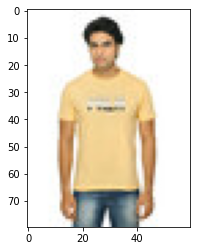

In [13]:
plt.imshow(images[0])

In [14]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.1, random_state=10)

In [16]:
Y_train_req = to_categorical(Y_train)
Y_test_req = to_categorical(Y_test)

print(X_train.shape, X_test.shape, Y_train_req.shape, Y_test_req.shape)

(39996, 80, 60, 3) (4444, 80, 60, 3) (39996, 143) (4444, 143)


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentor = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True, validation_split=0.1)

train_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='training')
val_batches = augmentor.flow(X_train, Y_train_req, shuffle=True, subset='validation')

In [18]:
from tensorflow.keras.layers import Conv2D, Input, Flatten, Dense, MaxPooling2D, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential

In [33]:
model = Sequential()
model.add(Input((80, 60, 3)))

model.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(16, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(32, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(64, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(Conv2D(128, (3,3), strides=1, padding='same', kernel_initializer='glorot_normal', activation='relu'))
model.add(BatchNormalization(axis=3))
model.add(MaxPooling2D((2,2), strides=2))

model.add(Flatten())

# model.add(Dense(512, kernel_initializer='glorot_normal', activation='relu'))
model.add(Dense(143, activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 80, 60, 16)        448       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 80, 60, 16)        2320      
_________________________________________________________________
batch_normalization_4 (Batch (None, 80, 60, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 40, 30, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 40, 30, 32)        4640      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 40, 30, 32)        9248      
_________________________________________________________________
batch_normalization_5 (Batch (None, 40, 30, 32)       

In [35]:
from tensorflow.keras.callbacks import ModelCheckpoint

cp = ModelCheckpoint(save_best_only=True, monitor='val_accuracy', mode='max', patience=20, filepath='D:/Image Classification Self/Data/Myntra Dataset/myntradataset/myntra_clothes_articletype_classification.h5')

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(train_batches, validation_data=val_batches, epochs=100, steps_per_epoch=(35996//32), callbacks=[cp])

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 1124 steps, validate for 125 steps
Epoch 1/100
1124/1124 [==============================] - 249s 222ms/step - loss: 1.6617 - accuracy: 0.5595 - val_loss: 1.5602 - val_accuracy: 0.5856
Epoch 2/100
1124/1124 [==============================] - 248s 221ms/step - loss: 1.0010 - accuracy: 0.7047 - val_loss: 1.1881 - val_accuracy: 0.6547
Epoch 3/100
1124/1124 [==============================] - 248s 220ms/step - loss: 0.8388 - accuracy: 0.7458 - val_loss: 1.9996 - val_accuracy: 0.5531
Epoch 4/100
1124/1124 [==============================] - 249s 221ms/step - loss: 0.7482 - accuracy: 0.7659 - val_loss: 0.8385 - val_accuracy: 0.7407
Epoch 5/100
1124/1124 [==============================] - 248s 221ms/step - loss: 0.6802 - accuracy: 0.7837 - val_loss: 0.7916 - val_accuracy: 0.7587
Epoch 6/100
1124/1124 [==============================] - 261s 232ms/step - loss: 0.6368 - accuracy: 0.7965 - val_loss: 0.8773 - val_accuracy: 0.7392
Epoch 7/100

 164/1124 [===>..........................] - ETA: 3:25 - loss: 0.1736 - accuracy: 0.9331

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.evaluate(X_test, Y_test_req)

In [ ]:
from tensorflow.keras.models import load_model

model_new = load_model('D:/Image Classification Self/Data/Myntra Dataset/myntradataset/myntra_clothes_articletype_classification.h5')

In [ ]:
predictions = []

for i in range(len(X_test)):
    image = X_test[i].reshape((1, 80, 60, 3))
    pred = model_new.predict(image)
    i = np.argmax(pred)
    predictions.append(i)

In [ ]:
predictions

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [ ]:
accuracy_score(Y_test, predictions)

In [ ]:
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(20, 20))
hm = sns.heatmap(cm, annot=True, square=True, cmap='Blues')
plt.show(hm)